In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv('bestsellers.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [11]:
rd = df.shape
rd

(550, 7)

Про скільки книг зберігає дані датасет? Відповідь: 550

In [18]:
new_column_names = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.rename(columns={'Name': 'name', 'Author': 'author', 'User Rating': 'user_rating', 'Reviews': 'reviews', 'Price': 'price', 'Year': 'year', 'Genre': 'genre'}, inplace=True)

In [19]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
# Виведення кількості пропусків у кожному стовпці
na = df.isna().sum()
na

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

#Відповідь: Чи є в якихось змінних пропуски? (Так / ні)'В змінних немає пропускі)

In [21]:
# Отримання унікальних значень в колонці "genre"
unique_genres = df['genre'].unique()

# Виведення унікальних значень
unique_genres

array(['Non Fiction', 'Fiction'], dtype=object)

Відповідь: Які є унікальні жанри?"'Non Fiction' 'Fiction)
#«Нехудожня література» «Художня література»

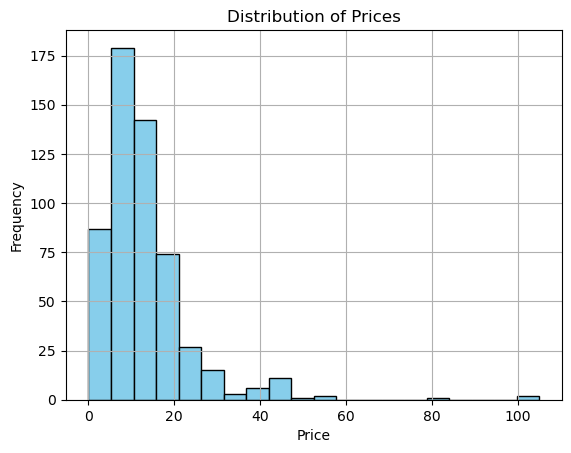

In [22]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
# Побудова діаграми розподілу цін
df['price'].hist(bins=20, color='skyblue', edgecolor='black')

# Додавання назви графіку та підписів осей
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Показ графіка
plt.show()

In [23]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
# Максимальна ціна
max_price = df['price'].max()

# Мінімальна ціна
min_price = df['price'].min()

# Середня ціна
mean_price = df['price'].mean()

# Медіанна ціна
median_price = df['price'].median()
#Відповідь: Максимальна ціна?
print("Відповідь: Максимальна ціна:", max_price)
#Відповідь: Мінімальна ціна?
print("Відповідь: Мінімальна ціна:", min_price)
#Відповідь: Середня ціна?
print("Відповідь: Середня ціна:", mean_price)
#Відповідь: Медіанна ціна?
print("Відповідь: Медіанна ціна:", median_price)

Відповідь: Максимальна ціна: 105
Відповідь: Мінімальна ціна: 0
Відповідь: Середня ціна: 13.1
Відповідь: Медіанна ціна: 11.0


In [24]:
#Відповідь: Який рейтинг у датасеті найвищий?
max_rating = df['user_rating'].max()
print("Відповідь: Максимальний рейтинг:", max_rating)

Відповідь: Максимальний рейтинг: 4.9


In [25]:
#Відповідь: Скільки книг мають такий рейтинг?
#1 Фільтрація книг за максимальним рейтингом
max_rating_books = df[df['user_rating'] == max_rating]
#2 Кількість книг з максимальним рейтингом
num_max_rating_books = len(max_rating_books)
# Виведення результатів
print("Відповідь: Кількість книг з максимальним рейтингом:", num_max_rating_books)

Відповідь: Кількість книг з максимальним рейтингом: 52


In [26]:
#Відповідь: Яка книга має найбільше відгуків?

max_reviews_book = df['reviews'].max()
max_book = df[df['reviews'] == max_reviews_book]
# Виведення результатів
print("Відповідь: Книга, яка має найбільше відгуків:\n")
max_book

Відповідь: Книга, яка має найбільше відгуків:



,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [27]:
#Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
# Фільтрація датафрейму за роком
df_2015 = df[df['year'] == 2015]
#print(df_2015)
# Найдорожча книга у 2015 році
most_expensive_book = df_2015[df_2015['price'] == df_2015['price'].max()]

print("Відповідь: Найдорожча книга у 2015 році:\n")
most_expensive_book

Відповідь: Найдорожча книга у 2015 році:



,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [29]:
#Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
print("Відповідь: Книги жанру Fiction, які потрапили до Топ-50 у 2010 році:\n")
fiction_2010

Відповідь: Книги жанру Fiction, які потрапили до Топ-50 у 2010 році:



,name,author,user_rating,reviews,price,year,genre
46,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2010,Fiction
56,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction
61,Dead in the Family (Sookie Stackhouse/True Blo...,Charlaine Harris,4.3,1924,8,2010,Fiction
218,Little Bee: A Novel,Chris Cleave,4.1,1467,10,2010,Fiction
236,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2010,Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
292,Sarah's Key,Tatiana de Rosnay,4.6,3619,10,2010,Fiction
340,The Art of Racing in the Rain: A Novel,Garth Stein,4.7,11813,10,2010,Fiction
357,The Confession: A Novel,John Grisham,4.3,3523,13,2010,Fiction
384,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,7747,14,2010,Fiction


In [30]:
num_books_fiction_2010 = len(fiction_2010)
print("Відповідь: Кількість книг жанру Fiction, які потрапили до Топ-50 у 2010 році: ")
num_books_fiction_2010

Відповідь: Кількість книг жанру Fiction, які потрапили до Топ-50 у 2010 році: 


20

In [31]:
#Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
books_4_9_2010_2011 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))]
num_books_4_9_2010_2011 = len(books_4_9_2010_2011)
print("Відповідь: Кількість книг з рейтингом 4.9 у 2010 або 2011 роках:", num_books_4_9_2010_2011)

Відповідь: Кількість книг з рейтингом 4.9 у 2010 або 2011 роках: 1


In [32]:
#Відсортувати за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів
#1 Фільтруємо дані за рейтингом у 2015 році та ціною менше 8 доларів
books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)]
#2 Відсортовуємо за зростанням ціни
sorted_books = books_2015_under_8.sort_values(by='price')
print('Відсортовані книги: \n')
sorted_books

Відсортовані книги: 



,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [33]:
#Відповідь: Яка книга остання у відсортованому списку?
last_book = sorted_books.iloc[[-1]]
print("Відповідь: Остання книга у відсортованому списку: \n")
last_book

Відповідь: Остання книга у відсортованому списку: 



,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


In [34]:
#III Агрегування даних та з'єднання таблиць

#Максимальна ціна для жанру Fiction
#1 Групування за жанром і обчислення максимальної ціни
max_price_by_genre = df.groupby('genre')['price'].max()
#2 Отримання максимальної ціни для жанру Fiction
max_price_fiction = max_price_by_genre['Fiction']
print("Відповідь: Максимальна ціна для жанру Fiction:", max_price_fiction)

Відповідь: Максимальна ціна для жанру Fiction: 82


In [35]:
#Мінімальна ціна для жанру Fiction
#1 Групування за жанром і обчислення мінімальної ціни
min_price_by_genre = df.groupby('genre')['price'].min()
#2 Отримання мінімальної ціни для жанру Fiction
min_price_fiction = min_price_by_genre['Fiction']
print("Відповідь: Мінімальна ціна для жанру Fiction:", min_price_fiction)

Відповідь: Мінімальна ціна для жанру Fiction: 0


In [36]:
#Максимальна ціна для жанру Non Fiction
#1 Групування за жанром і обчислення максимальної ціни
max_price_by_genre = df.groupby('genre')['price'].max()
#2 Отримання максимальної ціни для жанру Non Fiction
max_price_non_fiction = max_price_by_genre['Non Fiction']
print("Відповідь: Максимальна ціна для жанру Non Fiction:", max_price_non_fiction)

Відповідь: Максимальна ціна для жанру Non Fiction: 105


In [37]:
#Мінімальна ціна для жанру Non Fiction
#1 Групування за жанром і обчислення мінімальної ціни
min_price_by_genre = df.groupby('genre')['price'].min()
#2 Отримання мінімальної ціни для жанру Non Fiction
min_price_non_fiction = min_price_by_genre['Non Fiction']
print("Відповідь: Мінімальна ціна для жанру Non Fiction:", min_price_non_fiction)

Відповідь: Мінімальна ціна для жанру Non Fiction: 0


In [38]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів 
#(використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). 
#1 Групуємо за автором і підраховуємо кількість книг для кожного автора
books_by_author = df.groupby('author')['name'].agg(['count'])
#2 Перейменовуємо стовпець з кількістю книг
books_by_author = books_by_author.rename(columns={'count': 'books_count'})
# Виводимо новий датафрейм
books_by_author

,books_count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [39]:
#Відповідь: Якої розмірності вийшла таблиця?
print("Якої розмірності вийшла таблиця? Відповідь: ")
books_by_author.shape

Якої розмірності вийшла таблиця? Відповідь: 


(248, 1)

In [40]:
#Який автор має найбільше книг? 
# Знаходимо індекс автора з найбільшою кількістю книг
author_with_most_books = books_by_author['books_count'].idxmax()
print("Який автор має найбільше книг? Відповідь: ")
author_with_most_books

Який автор має найбільше книг? Відповідь: 


'Jeff Kinney'

In [41]:
#Відповідь: Який автор має найбільше книг? 
print("Скільки книг цього автора? Відповідь: ")
books_by_author.max()

Скільки книг цього автора? Відповідь: 


books_count    12
dtype: int64

In [43]:
#створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
#1 Групуємо за автором та обчислюємо середній рейтинг
average_rating_by_author = df.groupby('author')['user_rating'].mean().reset_index()
#2 Виводимо перші декілька рядків нового датафрейму
average_rating_by_author

,author,user_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [44]:
#3 Знаходимо автора з мінімальним середнім рейтингом
author_with_min_avg_rating = average_rating_by_author.loc[average_rating_by_author['user_rating'].idxmin()]
#4 Виводимо автора з мінімальним середнім рейтингом
print("У якого автора середній рейтинг мінімальний? Відповідь:")
author_with_min_avg_rating['author']

У якого автора середній рейтинг мінімальний? Відповідь:


'Donna Tartt'

In [45]:
# Який у цього автора середній рейтинг?
#1 Отримуємо середній рейтинг для автора з мінімальним середнім рейтингом
min_avg_rating = author_with_min_avg_rating['user_rating']
#2 Виводимо значення середнього рейтингу
print("Який у цього автора середній рейтинг? Відповідь: ")
min_avg_rating

Який у цього автора середній рейтинг? Відповідь: 


3.9

In [47]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг 
#(Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
# З'єднання датафреймів за допомогою concat з параметром axis=1
# Перевіряємо, що індекси унікальні та відповідають один одному
average_rating_by_author = average_rating_by_author.reset_index(drop=True)
books_by_author = books_by_author.reset_index(drop=True)
# Перевірка назв стовпців
average_rating_by_author.columns
books_by_author.columns
merged_df = pd.concat([average_rating_by_author, books_by_author], axis=1)
print(merged_df.columns)
#2 Виведемо з'єднаний датафрейм
print("Об'єднаний датафрейм \n")
merged_df

Index(['author', 'user_rating', 'books_count'], dtype='object')
Об'єднаний датафрейм 



,author,user_rating,books_count
0,Abraham Verghese,4.600000,2
1,Adam Gasiewski,4.400000,1
2,Adam Mansbach,4.800000,1
3,Adir Levy,4.800000,1
4,Admiral William H. McRaven,4.700000,1
...,...,...,...
243,Walter Isaacson,4.566667,3
244,William Davis,4.400000,2
245,William P. Young,4.600000,2
246,Wizards RPG Team,4.800000,3


In [49]:
# Сортування датафрейму за зростаючою кількістю книг та зростаючим рейтингом
sorted_merged_df = merged_df.sort_values(by=['books_count', 'user_rating'], ascending=[True, True])
# Виведення відсортованого датафрейму
sorted_merged_df

,author,user_rating,books_count
171,Muriel Barbery,4.000000,1
43,Chris Cleave,4.100000,1
109,Ian K. Smith M.D.,4.100000,1
186,Pierre Dukan,4.100000,1
81,Elizabeth Strout,4.200000,1
...,...,...,...
11,American Psychological Association,4.500000,10
226,Suzanne Collins,4.663636,11
92,Gary Chapman,4.736364,11
197,Rick Riordan,4.772727,11


In [50]:
author_max = sorted_merged_df.idxmax().values[0]
print(f"Відповідь: {author_max}")

Відповідь: 247


In [53]:
#Який автор перший у списку?
first_author = merged_df.iloc[0]
print("Автор, перший у списку. Відповідь: \n")
first_author

Автор, перший у списку. Відповідь: 



author         Abraham Verghese
user_rating                 4.6
books_count                   2
Name: 0, dtype: object

In [ ]:
import matplotlib.pyplot as plt

# Побудова графіка розподілу мов програмування
plt.figure(figsize=(8, 6))
desired_table['Мова програмування'].value_counts().plot(kind='bar', color=['dodgerblue', 'deepskyblue', 'lightskyblue'])
plt.title('Розподіл мов програмування')
plt.xlabel('Мова програмування')
plt.ylabel('Кількість спеціалістів')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

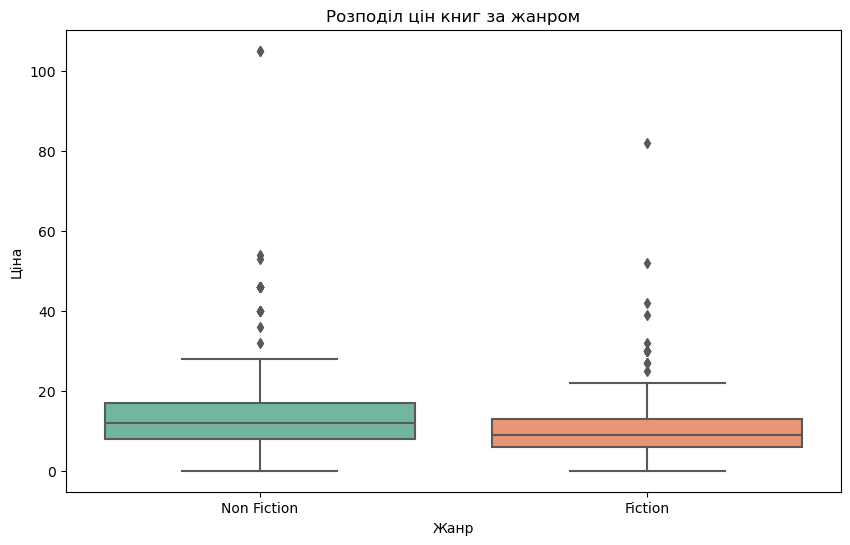

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Графік 1: Ящик з вусами для розподілу цін книг за жанром
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='genre', y='price', palette='Set2')
plt.title('Розподіл цін книг за жанром')
plt.xlabel('Жанр')
plt.ylabel('Ціна')
plt.show()

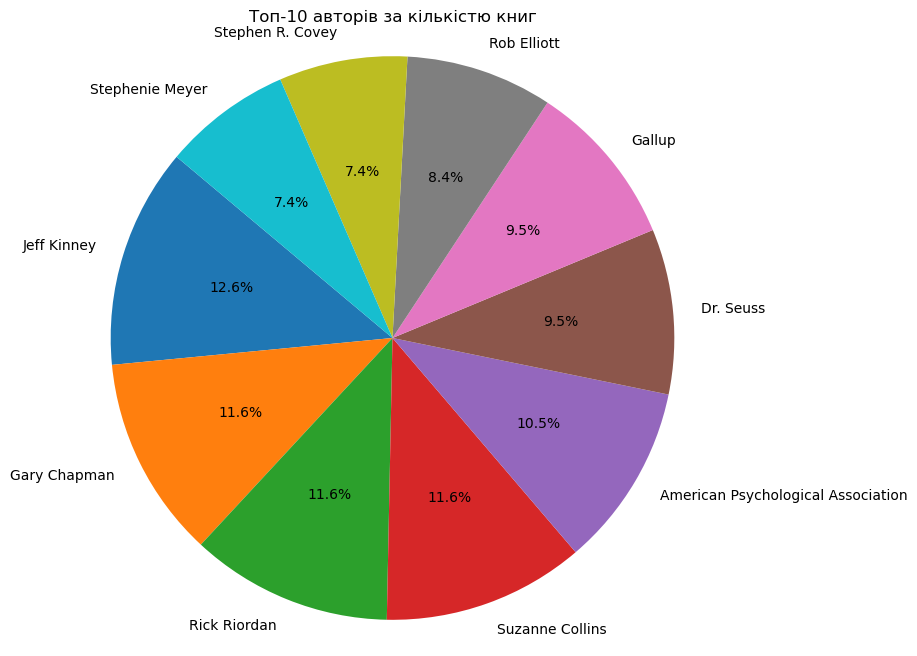

In [58]:
# Графік 2: Кругова діаграма для відсоткового співвідношення авторів
plt.figure(figsize=(8, 8))
author_counts = df['author'].value_counts().head(10)
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ-10 авторів за кількістю книг')
plt.axis('equal')
plt.show()

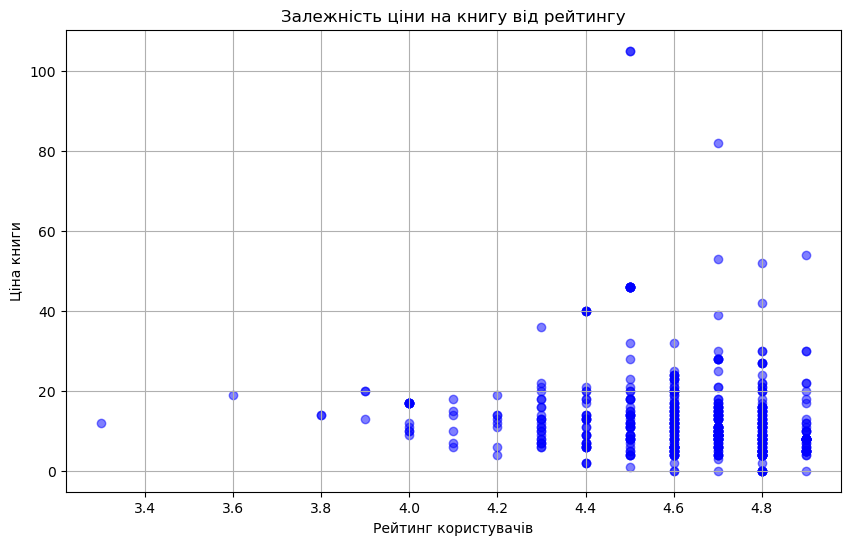

In [59]:
# Побудова scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['user_rating'], df['price'], color='blue', alpha=0.5)
plt.title('Залежність ціни на книгу від рейтингу')
plt.xlabel('Рейтинг користувачів')
plt.ylabel('Ціна книги')
plt.grid(True)
plt.show()